In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import rc
from sklearn.model_selection import train_test_split

# 주피터 노트북 한글 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Load datasets
health2017 = pd.read_csv('./data/NHIS_OPEN_GJ_2017.CSV', encoding='euc-kr')

# 기준년도, 가입자일련번호, AC~AH 제거
health2017 = health2017.iloc[:, 2:28]

# 결측치행 제거 ( null 값이 들어있는 행은 삭제한다. )
health2017 = health2017.dropna(axis=0)

# print(health2017.head())

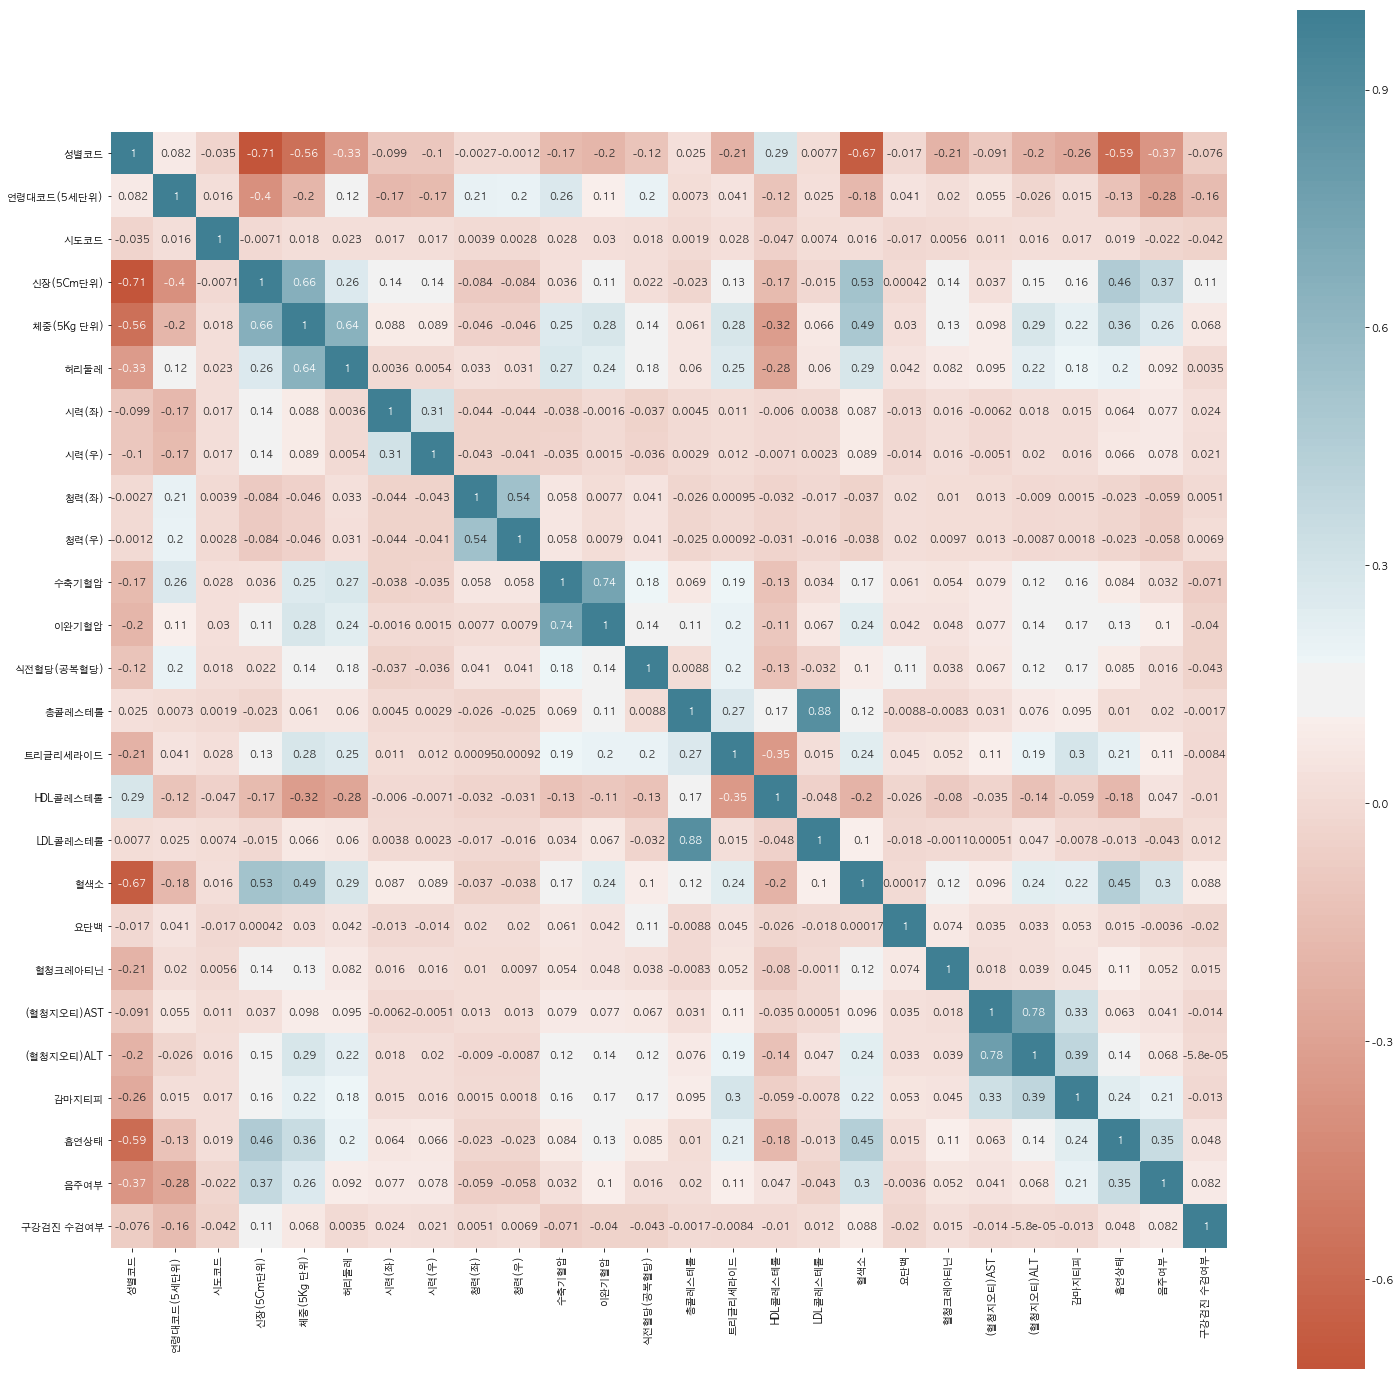

In [3]:
correlation = health2017.corr()

# print(correlation)
fig = plt.subplots(figsize=(25,25))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))

In [4]:
health2016 = pd.read_csv('./data/NHIS_OPEN_GJ_2016.CSV', encoding='euc-kr')

# 기준년도, 가입자일련번호, AC~AH 제거
health2016 = health2016.iloc[:, 2:28]

# 음주여부 행이 null 이므로 삭제
health2016 = health2016.drop(columns=['음주여부'])
# print(health2016.head())

# 결측치행 제거 ( null 값이 들어있는 행은 삭제한다. )
health2016 = health2016.dropna(axis=0)

# print(health2016.head())

In [5]:
# 2016년 음주여부 행이 null 이므로 2017년 데이터도 삭제
health2017 = health2017.drop(columns=['음주여부'])

# print(health2017.head())
# print(health2016.head())

# 2017년도 체중 칼럼은 체중(5kg 단위)이고 2016년도 체중 칼럼은 (5kg단위) 로 칼럼명이 다르기 때문에 concat시 null 값이 들어가서 칼럼명을 변경해야함
health2016.rename(columns={'체중(5Kg단위)': '체중(5Kg 단위)'}, inplace=True)

health = pd.concat([health2017, health2016])
# print(health.head())

   성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  \
0     1           13    46      170.0        65.0  91.0    1.0    1.2    1.0   
1     2            8    41      150.0        45.0  73.4    1.2    1.0    1.0   
2     1            8    45      175.0        75.0  94.0    1.0    0.8    1.0   
3     2           12    11      155.0        55.0  67.5    0.9    1.0    1.0   
4     1            8    41      175.0        75.0  93.0    1.5    1.5    1.0   

   청력(우)  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  \
0    1.0  ...      43.0     102.0  15.9  1.0      1.0        19.0        41.0   
1    1.0  ...      62.0     176.0  10.7  1.0      0.9        16.0        13.0   
2    1.0  ...      64.0      92.0  16.1  1.0      1.1        45.0        62.0   
3    1.0  ...      52.0      88.0  13.4  1.0      0.6        21.0        24.0   
4    1.0  ...      47.0     169.0  16.1  1.0      1.1        37.0        62.0   

   감마지티피  흡연상태  구강검진 수검여부  
0   

2017년과 2016년 데이터 종합 상관계수


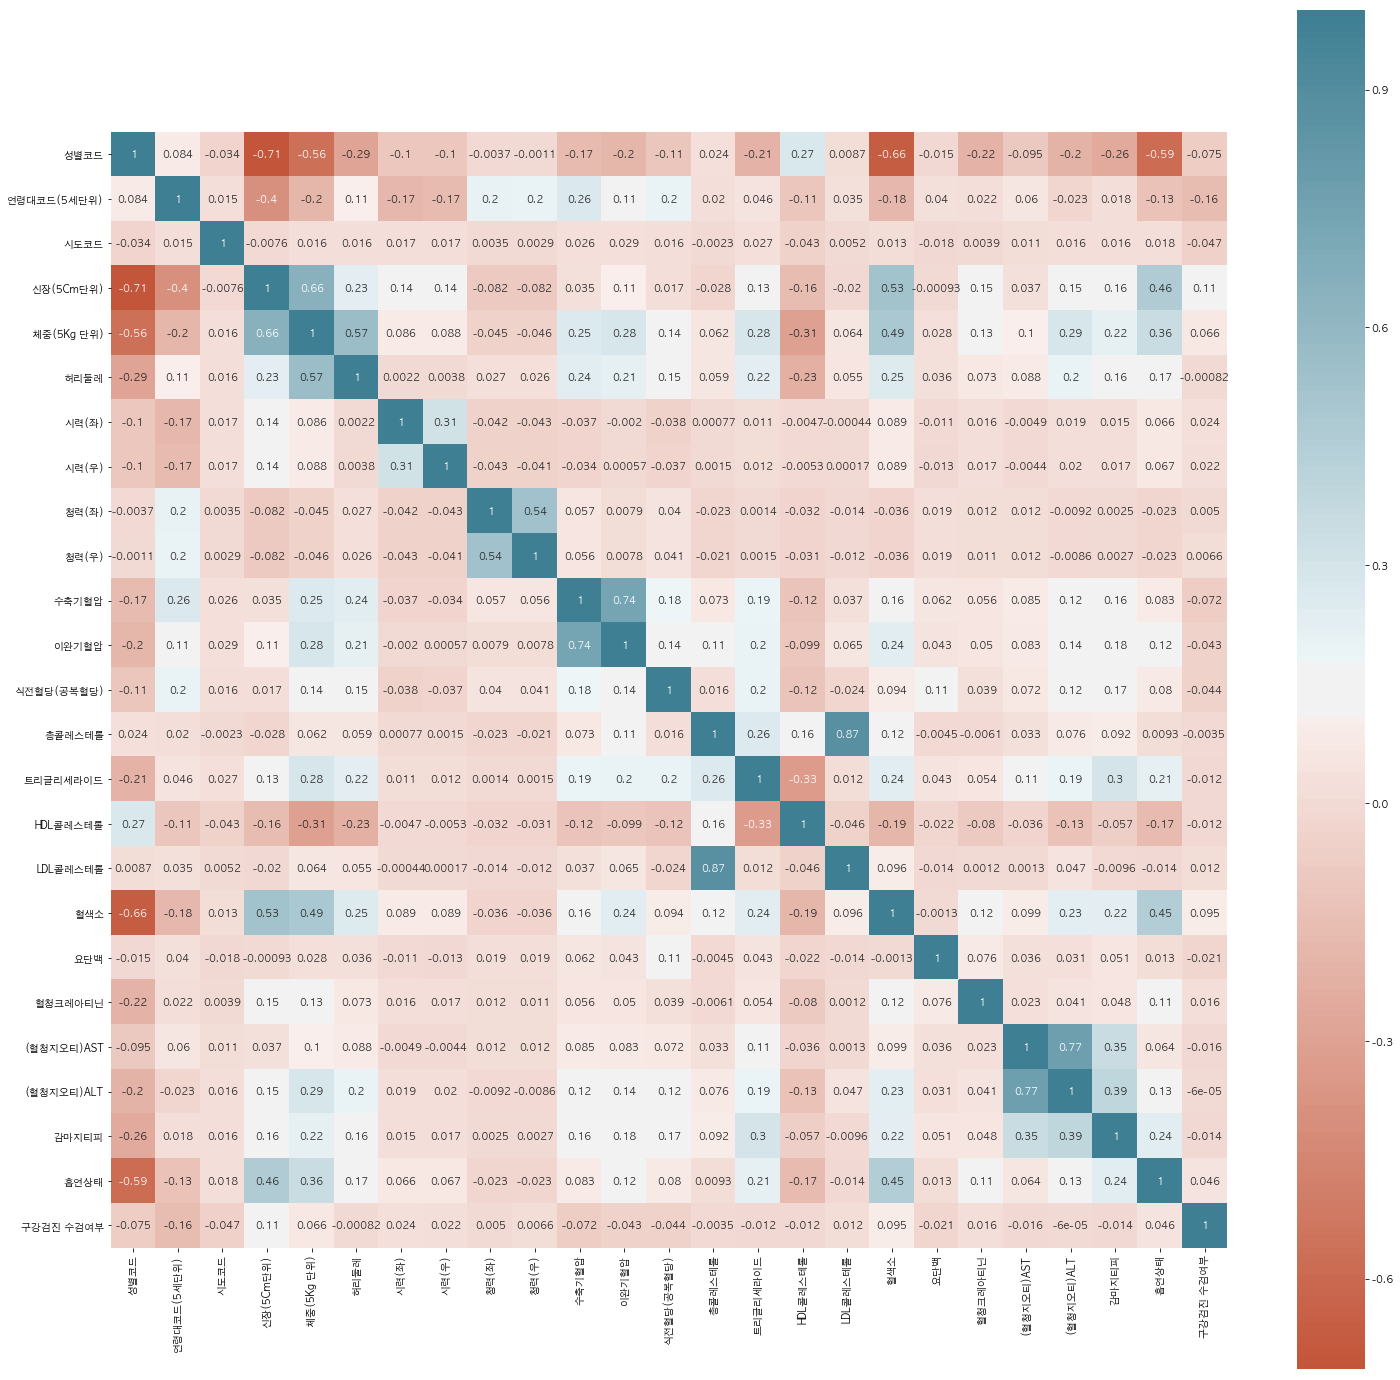

In [7]:
print("2017년과 2016년 데이터 종합 상관계수")
correlation = health.corr()

# print(correlation)
fig = plt.subplots(figsize=(25,25))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))